In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('data/exoTrain.csv')
X = train_df.iloc[:, 1:]  # All columns except 'LABEL'
y = train_df['LABEL']     # The 'LABEL' column

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_val)

In [10]:
print("Accuracy:", accuracy_score(y_val, y_pred))
# print("\nClass Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.9921414538310412


In [12]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1010    0]
 [   8    0]]


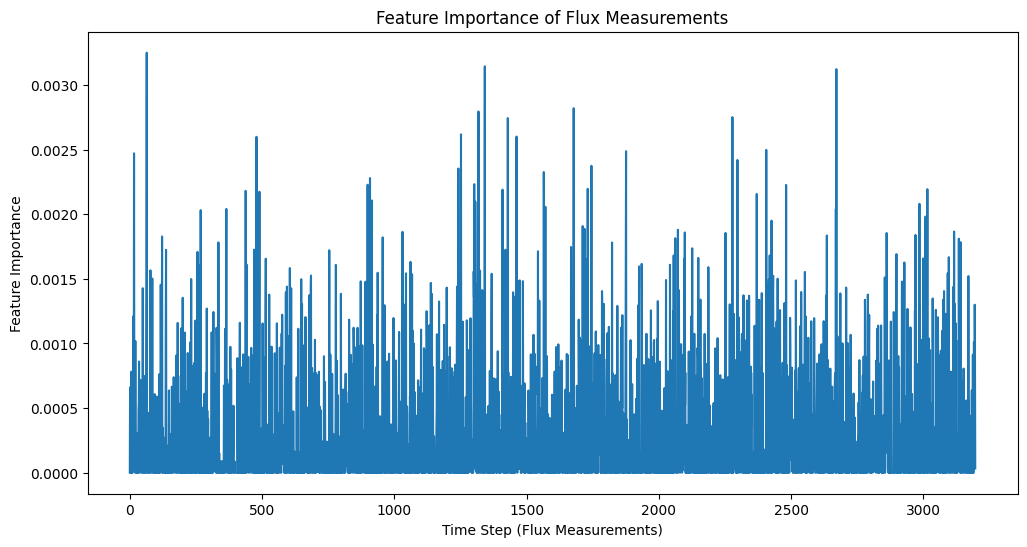

In [13]:
importances = model.feature_importances_
plt.figure(figsize=(12, 6))
plt.plot(importances)
plt.xlabel("Time Step (Flux Measurements)")
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Flux Measurements")
plt.show()

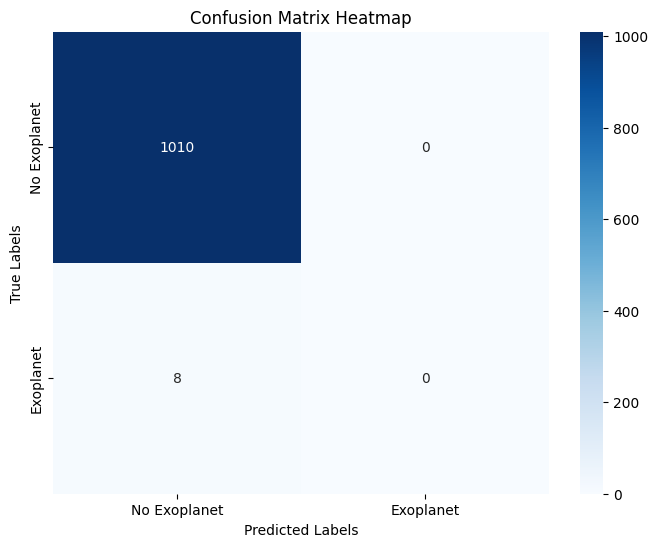

In [14]:
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Exoplanet', 'Exoplanet'], yticklabels=['No Exoplanet', 'Exoplanet'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
